In [1]:
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats
import collections
from scipy import stats
from scipy.signal import find_peaks
import warnings

warnings.filterwarnings('ignore')

In [2]:
def data_extract(dir_path):
    data = pd.read_csv(dir_path)
    data = data[-28:]
    data = data.iloc[1:, 2:5]
    columns = ['x-axis', 'y-axis', 'z-axis']
    data.columns = columns
    return data

def data_extract_train(dir_path):
    data = pd.read_csv(dir_path)
    data = data.iloc[1:, 2:5]
    return data

In [3]:

def feature_extract(df_test):
    x_list_test = []
    y_list_test = []
    z_list_test = []
    
    window_size = 26
    step_size = 2
  
    for i in range(0, df_test.shape[0] - window_size, step_size):
        xs = df_test['x-axis'].values[i: i + window_size]
        ys = df_test['y-axis'].values[i: i + window_size]
        zs = df_test['z-axis'].values[i: i + window_size]
    
        x_list_test.append(xs)
        y_list_test.append(ys)
        z_list_test.append(zs)
    
    # Statistical Features on raw x, y and z in time domain
    X_test = pd.DataFrame()
    # mean
    X_test['x_mean'] = pd.Series(x_list_test).apply(lambda x: x.mean())
    X_test['y_mean'] = pd.Series(y_list_test).apply(lambda x: x.mean())
    X_test['z_mean'] = pd.Series(z_list_test).apply(lambda x: x.mean())
    
    # std dev
    X_test['x_std'] = pd.Series(x_list_test).apply(lambda x: x.std())
    X_test['y_std'] = pd.Series(y_list_test).apply(lambda x: x.std())
    X_test['z_std'] = pd.Series(z_list_test).apply(lambda x: x.std())
    
    # avg absolute diff
    X_test['x_aad'] = pd.Series(x_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['y_aad'] = pd.Series(y_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['z_aad'] = pd.Series(z_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    
    # min
    X_test['x_min'] = pd.Series(x_list_test).apply(lambda x: x.min())
    X_test['y_min'] = pd.Series(y_list_test).apply(lambda x: x.min())
    X_test['z_min'] = pd.Series(z_list_test).apply(lambda x: x.min())
    
    # max
    X_test['x_max'] = pd.Series(x_list_test).apply(lambda x: x.max())
    X_test['y_max'] = pd.Series(y_list_test).apply(lambda x: x.max())
    X_test['z_max'] = pd.Series(z_list_test).apply(lambda x: x.max())
    
    # max-min diff
    X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
    X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
    X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']
    
    # median
    X_test['x_median'] = pd.Series(x_list_test).apply(lambda x: np.median(x))
    X_test['y_median'] = pd.Series(y_list_test).apply(lambda x: np.median(x))
    X_test['z_median'] = pd.Series(z_list_test).apply(lambda x: np.median(x))
    
    # median abs dev 
    X_test['x_mad'] = pd.Series(x_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['y_mad'] = pd.Series(y_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['z_mad'] = pd.Series(z_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    
    # interquartile range
    X_test['x_IQR'] = pd.Series(x_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['y_IQR'] = pd.Series(y_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['z_IQR'] = pd.Series(z_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    
    # negtive count
    X_test['x_neg_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x < 0))
    X_test['y_neg_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x < 0))
    X_test['z_neg_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x < 0))
    
    # positive count
    X_test['x_pos_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > 0))
    X_test['y_pos_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > 0))
    X_test['z_pos_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > 0))
    
    # values above mean
    X_test['x_above_mean'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['y_above_mean'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['z_above_mean'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > x.mean()))
    
    # number of peaks
    X_test['x_peak_count'] = pd.Series(x_list_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['y_peak_count'] = pd.Series(y_list_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['z_peak_count'] = pd.Series(z_list_test).apply(lambda x: len(find_peaks(x)[0]))
    
    # skewness
    X_test['x_skewness'] = pd.Series(x_list_test).apply(lambda x: stats.skew(x))
    X_test['y_skewness'] = pd.Series(y_list_test).apply(lambda x: stats.skew(x))
    X_test['z_skewness'] = pd.Series(z_list_test).apply(lambda x: stats.skew(x))
    
    # kurtosis
    X_test['x_kurtosis'] = pd.Series(x_list_test).apply(lambda x: stats.kurtosis(x))
    X_test['y_kurtosis'] = pd.Series(y_list_test).apply(lambda x: stats.kurtosis(x))
    X_test['z_kurtosis'] = pd.Series(z_list_test).apply(lambda x: stats.kurtosis(x))
    # energy
    X_test['x_energy'] = pd.Series(x_list_test).apply(lambda x: np.sum(x**2)/window_size)
    X_test['y_energy'] = pd.Series(y_list_test).apply(lambda x: np.sum(x**2)/window_size)
    X_test['z_energy'] = pd.Series(z_list_test).apply(lambda x: np.sum(x**2)/window_size)

    # avg resultant
    X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_test)**2 + pd.Series(y_list_test)**2 + pd.Series(z_list_test)**2)**0.5)]
    
    # signal magnitude area
    X_test['sma'] =    pd.Series(x_list_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                      + pd.Series(z_list_test).apply(lambda x: np.sum(abs(x)/window_size))

    # converting the signals from time domain to frequency domain using FFT
    x_list_fft_test = pd.Series(x_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    y_list_fft_test = pd.Series(y_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    z_list_fft_test = pd.Series(z_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    
    # Statistical Features on raw x, y and z in frequency domain
    # FFT mean
    X_test['x_mean_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.mean())
    X_test['y_mean_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.mean())
    X_test['z_mean_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.mean())
    
    # FFT std dev
    X_test['x_std_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.std())
    X_test['y_std_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.std())
    X_test['z_std_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.std())
    
    # FFT avg absolute diff
    X_test['x_aad_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['y_aad_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['z_aad_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    
    # FFT min
    X_test['x_min_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.min())
    X_test['y_min_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.min())
    X_test['z_min_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.min())
    
    # FFT max
    X_test['x_max_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.max())
    X_test['y_max_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.max())
    X_test['z_max_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.max())
    
    # FFT max-min diff
    X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
    X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
    X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']
    
    # FFT median
    X_test['x_median_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.median(x))
    X_test['y_median_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.median(x))
    X_test['z_median_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.median(x))
    
    # FFT median abs dev 
    X_test['x_mad_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

    X_test['y_mad_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['z_mad_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    
    # FFT Interquartile range
    X_test['x_IQR_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['y_IQR_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['z_IQR_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    
    # FFT values above mean
    X_test['x_above_mean_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['y_above_mean_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['z_above_mean_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
    
    # FFT number of peaks
    X_test['x_peak_count_fft'] = pd.Series(x_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['y_peak_count_fft'] = pd.Series(y_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['z_peak_count_fft'] = pd.Series(z_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
    
    # FFT skewness
    X_test['x_skewness_fft'] = pd.Series(x_list_fft_test).apply(lambda x: stats.skew(x))
    X_test['y_skewness_fft'] = pd.Series(y_list_fft_test).apply(lambda x: stats.skew(x))
    X_test['z_skewness_fft'] = pd.Series(z_list_fft_test).apply(lambda x: stats.skew(x))
    
    # FFT kurtosis
    X_test['x_kurtosis_fft'] = pd.Series(x_list_fft_test).apply(lambda x: stats.kurtosis(x))
    X_test['y_kurtosis_fft'] = pd.Series(y_list_fft_test).apply(lambda x: stats.kurtosis(x))
    X_test['z_kurtosis_fft'] = pd.Series(z_list_fft_test).apply(lambda x: stats.kurtosis(x))
    
    # FFT energy
    X_test['x_energy_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(x**2)/50)
    X_test['y_energy_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.sum(x**2)/50)
    X_test['z_energy_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.sum(x**2/50))
    
    # FFT avg resultant
    X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft_test)**2 + pd.Series(y_list_fft_test)**2 + pd.Series(z_list_fft_test)**2)**0.5)]
    
    # FFT Signal magnitude area
    X_test['sma_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_fft_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                         + pd.Series(z_list_fft_test).apply(lambda x: np.sum(abs(x)/window_size))

    return X_test


In [4]:
def feature_extract_train(df_test):
    x_list_test = []
    y_list_test = []
    z_list_test = []
    test_labels = []
    
    window_size = 26
    step_size = 2
  
    for i in range(0, df_test.shape[0] - window_size, step_size):
        xs = df_test['x-axis'].values[i: i + window_size]
        ys = df_test['y-axis'].values[i: i + window_size]
        zs = df_test['z-axis'].values[i: i + window_size]
    
        label = stats.mode(df_test['action'][i: i + window_size])[0][0]
    
        x_list_test.append(xs)
        y_list_test.append(ys)
        z_list_test.append(zs)
        test_labels.append(label)
    
    # Statistical Features on raw x, y and z in time domain
    X_test = pd.DataFrame()
    # mean
    X_test['x_mean'] = pd.Series(x_list_test).apply(lambda x: x.mean())
    X_test['y_mean'] = pd.Series(y_list_test).apply(lambda x: x.mean())
    X_test['z_mean'] = pd.Series(z_list_test).apply(lambda x: x.mean())
    
    # std dev
    X_test['x_std'] = pd.Series(x_list_test).apply(lambda x: x.std())
    X_test['y_std'] = pd.Series(y_list_test).apply(lambda x: x.std())
    X_test['z_std'] = pd.Series(z_list_test).apply(lambda x: x.std())
    
    # avg absolute diff
    X_test['x_aad'] = pd.Series(x_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['y_aad'] = pd.Series(y_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['z_aad'] = pd.Series(z_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    
    # min
    X_test['x_min'] = pd.Series(x_list_test).apply(lambda x: x.min())
    X_test['y_min'] = pd.Series(y_list_test).apply(lambda x: x.min())
    X_test['z_min'] = pd.Series(z_list_test).apply(lambda x: x.min())
    
    # max
    X_test['x_max'] = pd.Series(x_list_test).apply(lambda x: x.max())
    X_test['y_max'] = pd.Series(y_list_test).apply(lambda x: x.max())
    X_test['z_max'] = pd.Series(z_list_test).apply(lambda x: x.max())
    
    # max-min diff
    X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
    X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
    X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']
    
    # median
    X_test['x_median'] = pd.Series(x_list_test).apply(lambda x: np.median(x))
    X_test['y_median'] = pd.Series(y_list_test).apply(lambda x: np.median(x))
    X_test['z_median'] = pd.Series(z_list_test).apply(lambda x: np.median(x))
    
    # median abs dev 
    X_test['x_mad'] = pd.Series(x_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['y_mad'] = pd.Series(y_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['z_mad'] = pd.Series(z_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    
    # interquartile range
    X_test['x_IQR'] = pd.Series(x_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['y_IQR'] = pd.Series(y_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['z_IQR'] = pd.Series(z_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    
    # negtive count
    X_test['x_neg_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x < 0))
    X_test['y_neg_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x < 0))
    X_test['z_neg_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x < 0))
    
    # positive count
    X_test['x_pos_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > 0))
    X_test['y_pos_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > 0))
    X_test['z_pos_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > 0))
    
    # values above mean
    X_test['x_above_mean'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['y_above_mean'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['z_above_mean'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > x.mean()))
    
    # number of peaks
    X_test['x_peak_count'] = pd.Series(x_list_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['y_peak_count'] = pd.Series(y_list_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['z_peak_count'] = pd.Series(z_list_test).apply(lambda x: len(find_peaks(x)[0]))
    
    # skewness
    X_test['x_skewness'] = pd.Series(x_list_test).apply(lambda x: stats.skew(x))
    X_test['y_skewness'] = pd.Series(y_list_test).apply(lambda x: stats.skew(x))
    X_test['z_skewness'] = pd.Series(z_list_test).apply(lambda x: stats.skew(x))
    
    # kurtosis
    X_test['x_kurtosis'] = pd.Series(x_list_test).apply(lambda x: stats.kurtosis(x))
    X_test['y_kurtosis'] = pd.Series(y_list_test).apply(lambda x: stats.kurtosis(x))
    X_test['z_kurtosis'] = pd.Series(z_list_test).apply(lambda x: stats.kurtosis(x))
    # energy
    X_test['x_energy'] = pd.Series(x_list_test).apply(lambda x: np.sum(x**2)/window_size)
    X_test['y_energy'] = pd.Series(y_list_test).apply(lambda x: np.sum(x**2)/window_size)
    X_test['z_energy'] = pd.Series(z_list_test).apply(lambda x: np.sum(x**2)/window_size)

    # avg resultantfor_testing.csv
    X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_test)**2 + pd.Series(y_list_test)**2 + pd.Series(z_list_test)**2)**0.5)]
    
    # signal magnitude area
    X_test['sma'] =    pd.Series(x_list_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                      + pd.Series(z_list_test).apply(lambda x: np.sum(abs(x)/window_size))

    # converting the signals from time domain to frequency domain using FFT
    x_list_fft_test = pd.Series(x_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    y_list_fft_test = pd.Series(y_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    z_list_fft_test = pd.Series(z_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
    
    # Statistical Features on raw x, y and z in frequency domain
    # FFT mean
    X_test['x_mean_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.mean())
    X_test['y_mean_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.mean())
    X_test['z_mean_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.mean())
    
    # FFT std dev
    X_test['x_std_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.std())
    X_test['y_std_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.std())
    X_test['z_std_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.std())
    
    # FFT avg absolute diff
    X_test['x_aad_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['y_aad_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    X_test['z_aad_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
    
    # FFT min
    X_test['x_min_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.min())
    X_test['y_min_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.min())
    X_test['z_min_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.min())
    
    # FFT max
    X_test['x_max_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.max())
    X_test['y_max_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.max())
    X_test['z_max_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.max())
    
    # FFT max-min diff
    X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
    X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
    X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']
    
    # FFT median
    X_test['x_median_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.median(x))
    X_test['y_median_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.median(x))
    X_test['z_median_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.median(x))
    
    # FFT median abs dev 
    X_test['x_mad_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['y_mad_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    X_test['z_mad_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
    
    # FFT Interquartile range
    X_test['x_IQR_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['y_IQR_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    X_test['z_IQR_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
    
    # FFT values above mean
    X_test['x_above_mean_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['y_above_mean_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
    X_test['z_above_mean_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
    
    # FFT number of peaks
    X_test['x_peak_count_fft'] = pd.Series(x_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['y_peak_count_fft'] = pd.Series(y_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
    X_test['z_peak_count_fft'] = pd.Series(z_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
    
    # FFT skewness
    X_test['x_skewness_fft'] = pd.Series(x_list_fft_test).apply(lambda x: stats.skew(x))
    X_test['y_skewness_fft'] = pd.Series(y_list_fft_test).apply(lambda x: stats.skew(x))
    X_test['z_skewness_fft'] = pd.Series(z_list_fft_test).apply(lambda x: stats.skew(x))
    
    # FFT kurtosis
    X_test['x_kurtosis_fft'] = pd.Series(x_list_fft_test).apply(lambda x: stats.kurtosis(x))
    X_test['y_kurtosis_fft'] = pd.Series(y_list_fft_test).apply(lambda x: stats.kurtosis(x))
    X_test['z_kurtosis_fft'] = pd.Series(z_list_fft_test).apply(lambda x: stats.kurtosis(x))
    
    # FFT energy
    X_test['x_energy_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(x**2)/50)
    X_test['y_energy_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.sum(x**2)/50)
    X_test['z_energy_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.sum(x**2/50))
    
    # FFT avg resultant
    X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft_test)**2 + pd.Series(y_list_fft_test)**2 + pd.Series(z_list_fft_test)**2)**0.5)]
    
    # FFT Signal magnitude area
    X_test['sma_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_fft_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                         + pd.Series(z_list_fft_test).apply(lambda x: np.sum(abs(x)/window_size))
    # y_test = np.array(test_labels)
    y_test = test_labels
    return X_test, y_test

In [5]:

still0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still.csv")
still1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_1.csv")
still2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_2.csv")
still3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_3.csv")
still4 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_4.csv")
still5 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_5.csv")
still6 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_6.csv")
still7 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_7.csv")
still8 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/still_8.csv")
still = pd.concat([still0, still2, still3, still4, still5, still6, still7, still8])

front_down0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down.csv")
front_down1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_1.csv")
front_down2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_2.csv")
front_down3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_3.csv")
front_down4 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_4.csv")
front_down5 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_5.csv")
front_down6 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_6.csv")
front_down7 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_7.csv")
front_down8 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/front_down_8.csv")
front_down = pd.concat([front_down0, front_down2, front_down3, front_down4, front_down5, front_down6, front_down7, front_down8])
back_down0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down.csv")
back_down1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_1.csv")
back_down2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_2.csv")
back_down3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_3.csv")
back_down4 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_4.csv")
back_down5 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_5.csv")
back_down6 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_6.csv")
back_down7 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_7.csv")
back_down8 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/back_down_8.csv")
back_down = pd.concat([back_down0, back_down2, back_down3, back_down4, back_down5, back_down6, back_down7, back_down8])
trun_left0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left.csv")
trun_left1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_1.csv")
trun_left2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_2.csv")
trun_left3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_3.csv")
trun_left4 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_4.csv")
trun_left5 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_5.csv")
trun_left6 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_6.csv")
trun_left7 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_7.csv")
trun_left8 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_left_8.csv")
# trun_left = pd.concat([trun_left0, trun_left2, trun_left3, trun_left4])
trun_right0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right.csv")
trun_right1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_1.csv")
trun_right2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_2.csv")
trun_right3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_3.csv")
trun_right4 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_4.csv")
trun_right5 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_5.csv")
trun_right6 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_6.csv")
trun_right7 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_7.csv")
trun_right8 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/trun_right_8.csv")
# trun_right = pd.concat([trun_right0, trun_right2, trun_right3, trun_right4])
trun_around0 = pd.concat([trun_right0, trun_left0])
trun_around1 = pd.concat([trun_right1, trun_left1])
trun_around2 = pd.concat([trun_right2, trun_left2])
trun_around3 = pd.concat([trun_right3, trun_left3])
trun_around4 = pd.concat([trun_right4, trun_left4])
trun_around5 = pd.concat([trun_right5, trun_left5])
trun_around6 = pd.concat([trun_right6, trun_left6])
trun_around7 = pd.concat([trun_right7, trun_left7])
trun_around8 = pd.concat([trun_right8, trun_left8])
trun_around = pd.concat([trun_around0, trun_around2, trun_around3, trun_around4, trun_around5, trun_around6, trun_around7, trun_around8])
tilts_left0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_left.csv")
tilts_left1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_left_1.csv")
tilts_left2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_left_2.csv")
tilts_left3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_left_3.csv")
tilts_right0 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_right.csv")
tilts_right1 = pd.read_csv("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_right_1.csv")
tilts_right2 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_right_2.csv")
tilts_right3 = data_extract_train("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/outputs/tilts_right_3.csv")
tilts_around0 = pd.concat([tilts_right0, tilts_left0])
tilts_around1 = pd.concat([tilts_right1, tilts_left1])
tilts_around2 = pd.concat([tilts_right2, tilts_left2])
tilts_around3 = pd.concat([tilts_right3, tilts_left3])
tilts_around = pd.concat([tilts_around0, tilts_around2, tilts_around3])
still["action"] = "still"
still1["action"] = "still"
front_down["action"] = "front_down"
front_down1["action"] = "front_down"
back_down["action"] = "back_down"
back_down1["action"] = "back_down"
# trun_left["action"] = "turn_left"
# trun_left1["action"] = "turn_left"
# trun_right["action"] = "turn_right"
# trun_right1["action"] = "turn_right"
trun_around["action"] = "trun_around"
trun_around1["action"] = "trun_around"
tilts_around["action"] = "tilts_around"
tilts_around1["action"] = "tilts_around"
# trun_right.head()
# df_train = pd.concat([still, front_down, back_down, trun_left, trun_right])
df_train = pd.concat([still, front_down, back_down, trun_around, tilts_around])
# df_test = pd.concat([still1.iloc[1:, 2:6], front_down1.iloc[1:, 2:6], back_down1.iloc[1:, 2:6], trun_left1.iloc[1:, 2:6], trun_right1.iloc[1:, 2:6]])
df_test = pd.concat([still1.iloc[1:, 2:6], front_down1.iloc[1:, 2:6], back_down1.iloc[1:, 2:6], trun_around1.iloc[1:, 2:6], tilts_around1.iloc[1:, 2:6]])
columns = ['x-axis', 'y-axis', 'z-axis','action']
df_train.columns = columns
df_test.columns = columns
df_train, y_train = feature_extract_train(df_train)
df_test, y_test = feature_extract_train(df_test)

# standardization
scaler = StandardScaler()
scaler.fit(df_train)
X_train_data_lr = scaler.transform(df_train)
X_test_data_lr = scaler.transform(df_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)
y_pred = lr.predict(X_test_data_lr)
print("y_pred:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))



y_pred: ['still' 'still' 'still' ... 'tilts_around' 'trun_around' 'trun_around']
Accuracy: 0.9110344827586206

 -------------Classification Report-------------

              precision    recall  f1-score   support

   back_down       0.77      0.92      0.84       233
  front_down       0.90      0.81      0.85       193
       still       1.00      0.96      0.98       142
tilts_around       0.96      1.00      0.98       462
 trun_around       0.93      0.84      0.88       420

    accuracy                           0.91      1450
   macro avg       0.91      0.91      0.91      1450
weighted avg       0.92      0.91      0.91      1450



In [6]:
still_list = ['still'] * 5
print(still_list)
list_compare = [''] * 5
count_still = 0
while True:
    data0 = data_extract("/u/44/yangz2/unix/Documents/vs_code_programs/movesense-data-collector/movesense-data-collector/output/test.csv")
    data1 = feature_extract(data0)
    data_lr = scaler.transform(data1)
    y_pred0 = lr.predict(data_lr)
    y_pred1 = collections.Counter(y_pred0)
    y_pred12 = max(y_pred1, key = lambda x: y_pred1[x])
    list_compare[count_still] = y_pred12
    count_still = (count_still + 1) % 5
    if still_list == list_compare:
        print("Please move your heads to keep healthy!") 
    print(y_pred12)
    time.sleep(2)

['still', 'still', 'still', 'still', 'still']
still
still
still
still
Please move your heads to keep healthy!
still
Please move your heads to keep healthy!
still
trun_around
tilts_around
tilts_around
tilts_around
tilts_around
trun_around
trun_around
trun_around
trun_around
front_down
front_down
front_down
front_down
back_down
back_down
back_down
back_down
back_down
still
still


KeyboardInterrupt: 

1450 1450
['still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still', 'still',

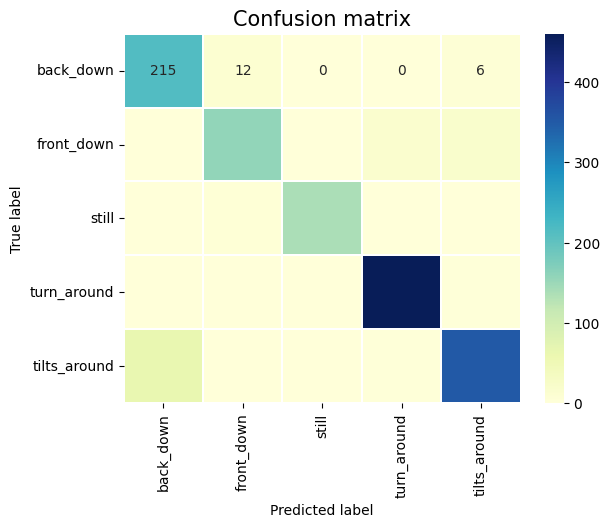

In [ ]:
# labels = ['back_down','front_down','still','turn_left','turn_right']
labels = ['back_down','front_down','still','turn_around', 'tilts_around']
print(len(y_test), len(y_pred))
print(y_test)
print(y_pred)
confusion_matrix2 = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix2, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()